In [169]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams

rcParams['font.size']=16

code below defines the shock paramters for a red light

In [170]:
def density_red_light(nx, density_max, density_in):
    density = density_max*numpy.ones(nx)
    density[:(nx-1)*3/4] = density_in
    return density

In [171]:
#initial paramters and conditions

nx=81
nt=30
dx=4.0/(nx-1)

density_in=5
density_max=10

speed_max=1

x=numpy.linspace(0,4,nx)

DENSITY = density_red_light(nx,density_max,density_in)

C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


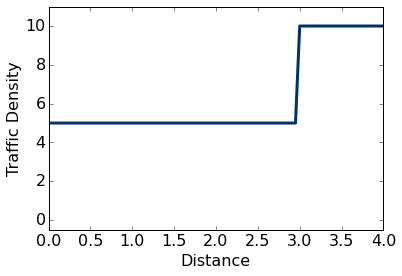

In [172]:
pyplot.plot(x, DENSITY, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic Density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5, 11);

note that the wave travels to the left. 
now we define some other useful functions

In [173]:
def Calculate_Flux(speed_max, density_max, DENSITY):
    
    return speed_max*DENSITY*(1-DENSITY/density_max)



In [174]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [175]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

This next section focuses on the Lax-Friedrichs scheme

In [176]:
def laxfriedrichs(DENSITY, nt, dt, dx, density_max, speed_max):
    rho_n = numpy.zeros((nt,len(DENSITY)))      

    rho_n[:,:] = DENSITY.copy()              
    
    
    for t in range(1,nt):
        F = Calculate_Flux(speed_max, density_max, DENSITY)
        rho_n[t,1:-1] = .5*(DENSITY[2:]+DENSITY[:-2]) - dt/(2*dx)*(F[2:]-F[:-2])
        rho_n[t,0] = DENSITY[0] # boundary condition at x=0
        rho_n[t,-1] = DENSITY[-1] # boundary condition at x=4
        DENSITY = rho_n[t].copy()
        
    return rho_n


CFL stability condition

In [177]:
sigma=1.0
dt=sigma*dx/speed_max

In [178]:
DENSITY = density_red_light(nx, density_max, density_in)

DENSITY_n = laxfriedrichs(DENSITY, nt, dt, dx, density_max, speed_max)

C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [179]:
DENSITY_n.shape

(30, 81)


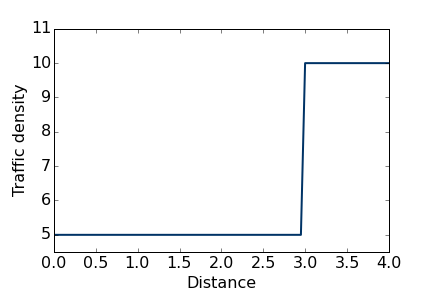
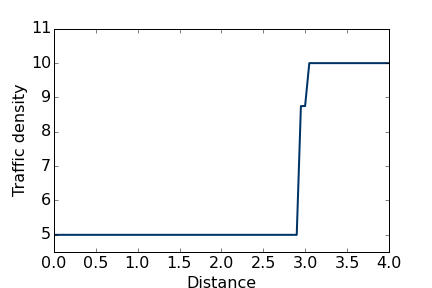
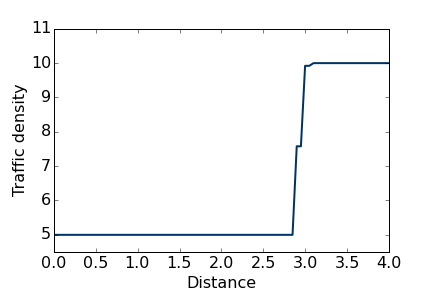
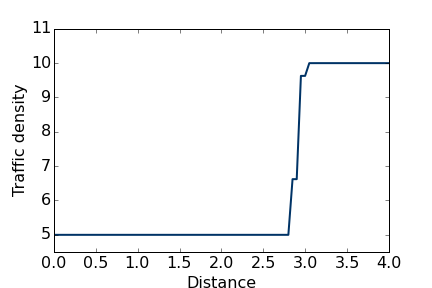
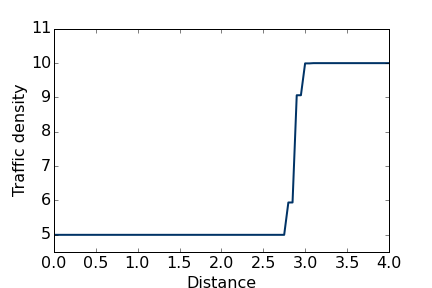
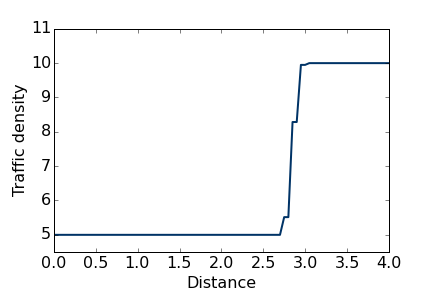
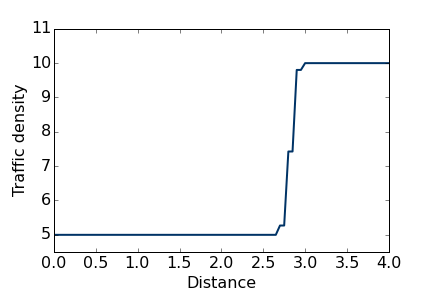
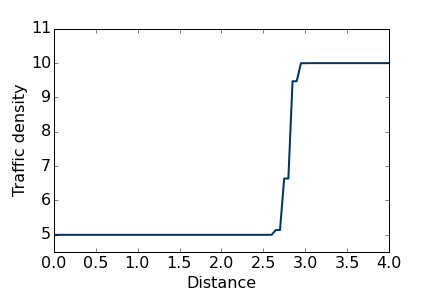
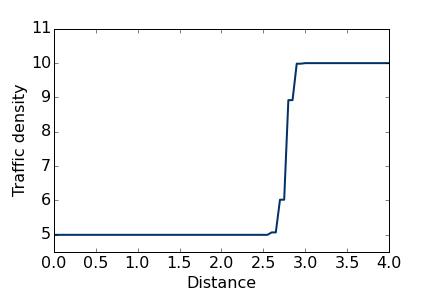
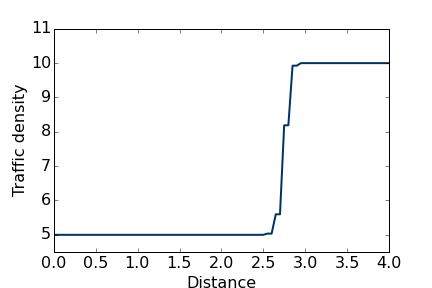
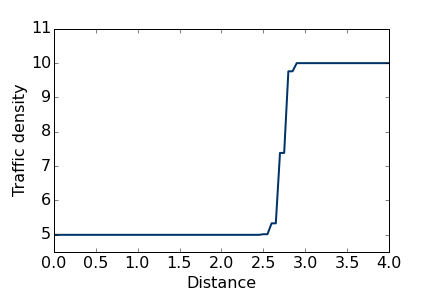
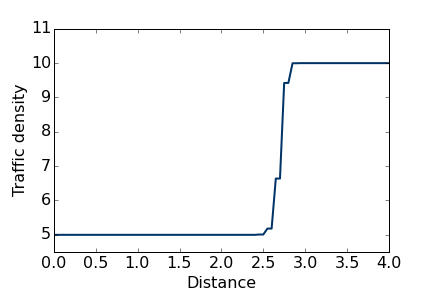
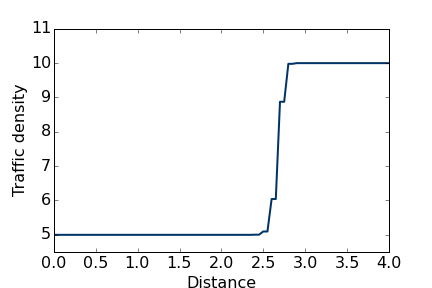
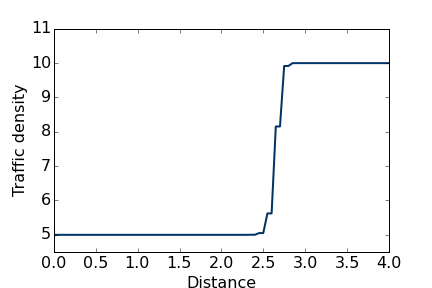
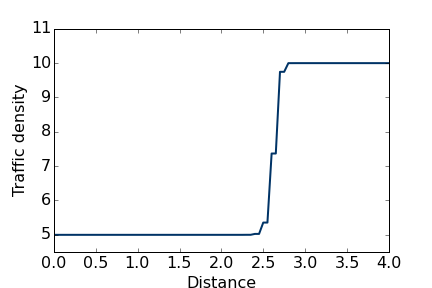
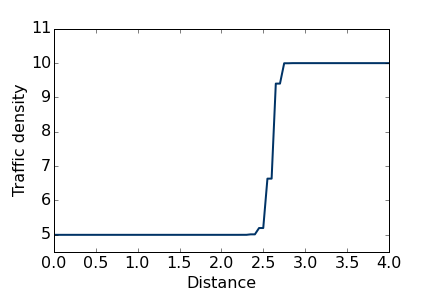
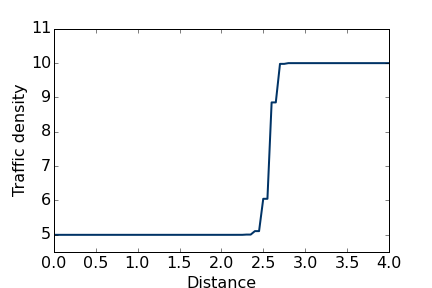
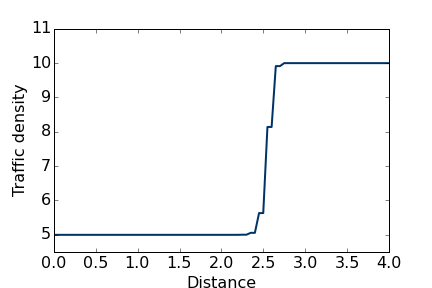
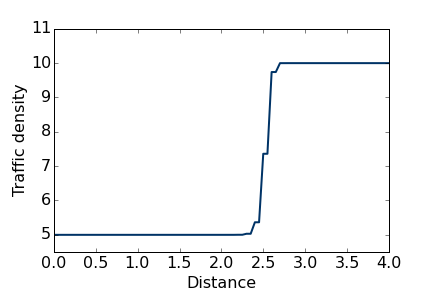
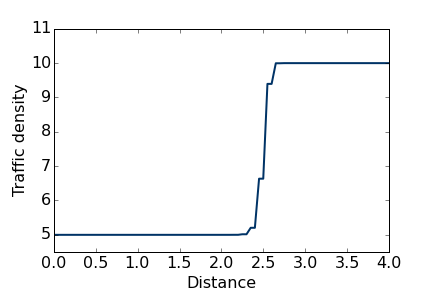
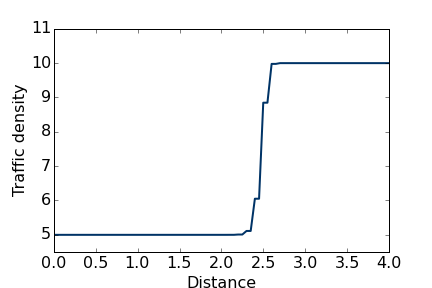
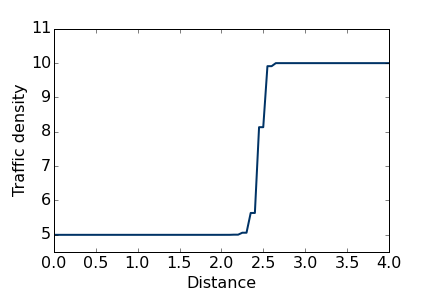
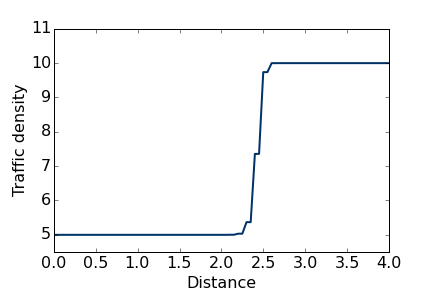
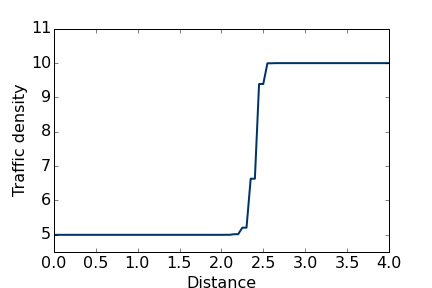
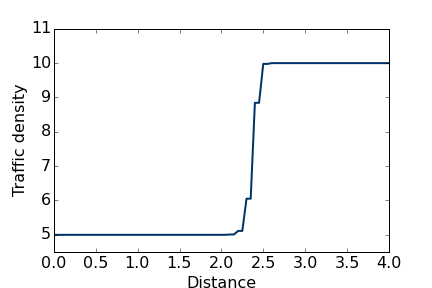
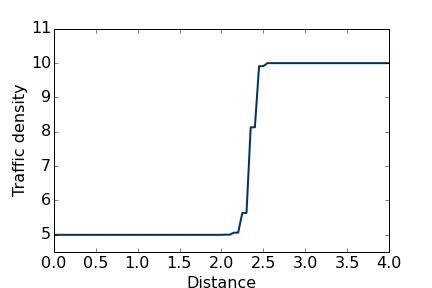
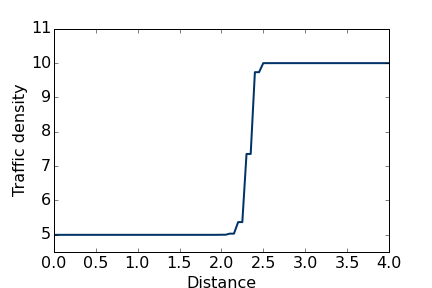
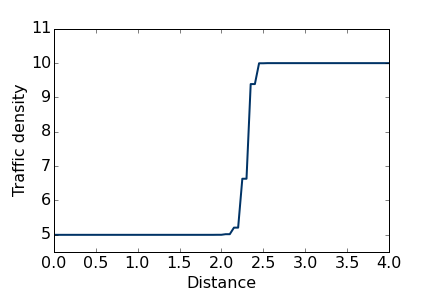
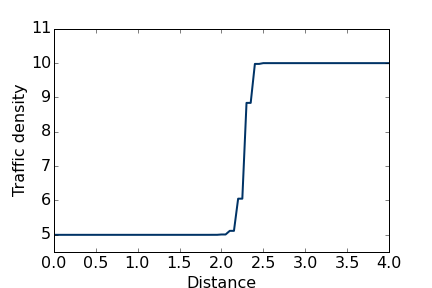
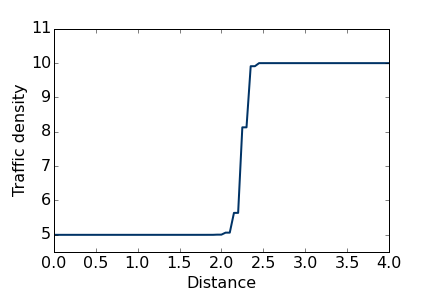

In [180]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=DENSITY_n, interval=50)
display_animation(anim, default_mode='once')

Now the Lax-Friedrichs scheme with dt/dx = 0.5 (smaller time step)

In [181]:
sigma = 0.5
dt=sigma*dx/speed_max

In [182]:
DENSITY = density_red_light(nx, density_max, density_in)
DENSITY_n = laxfriedrichs(DENSITY, nt, dt, dx, density_max, speed_max)

C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()



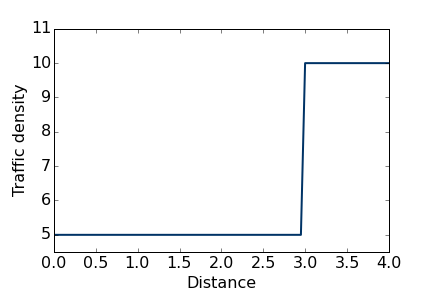
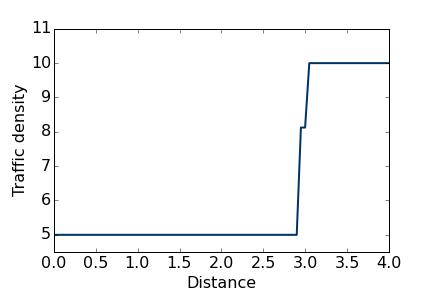
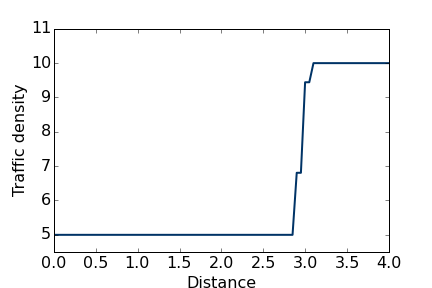
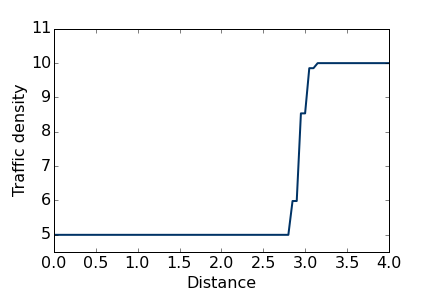
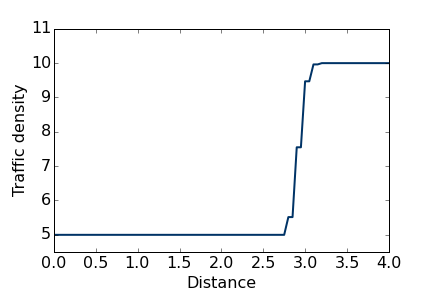
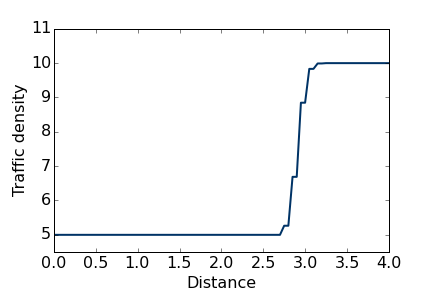
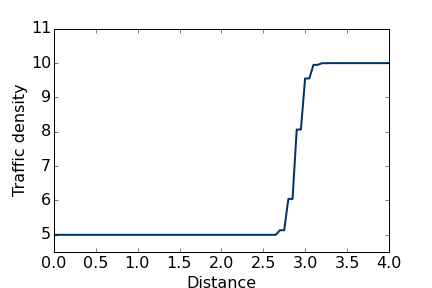
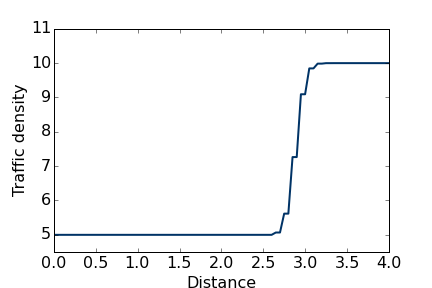
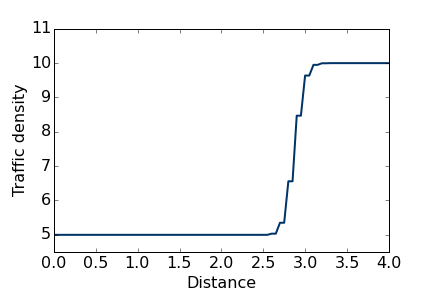
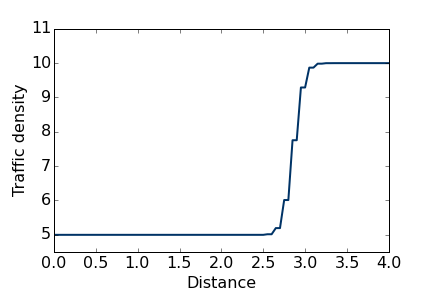
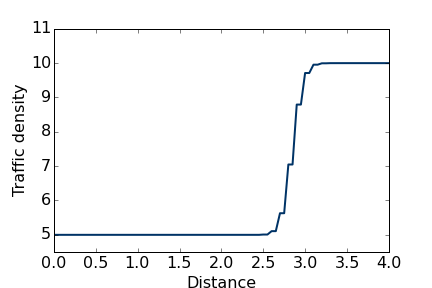
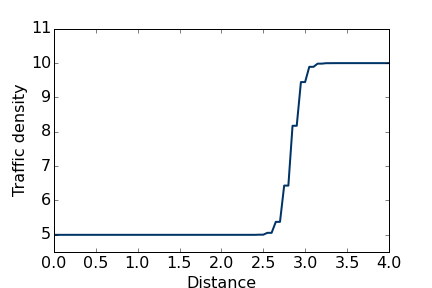
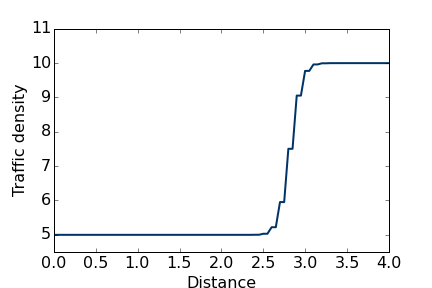
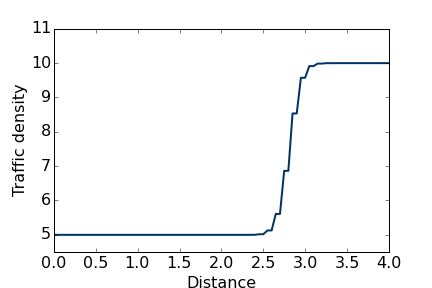
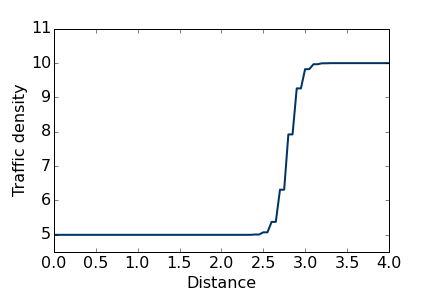
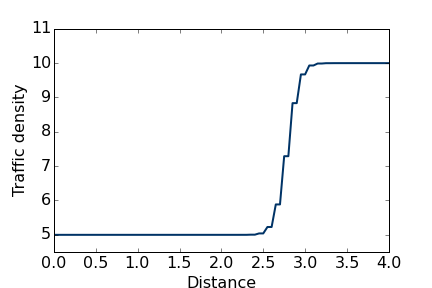
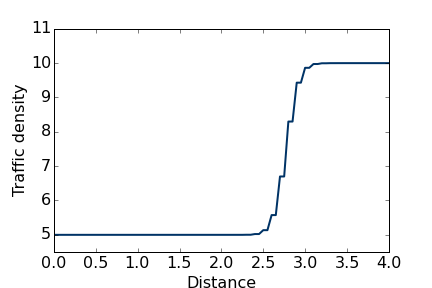
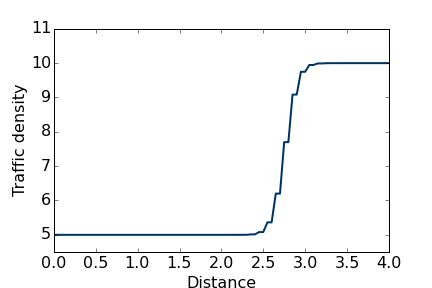
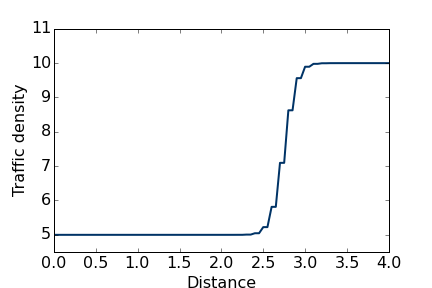
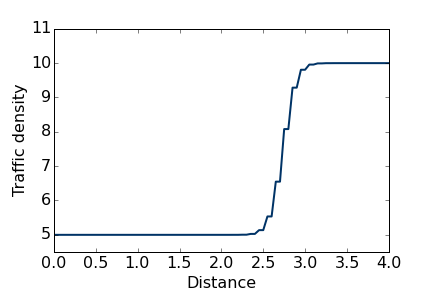
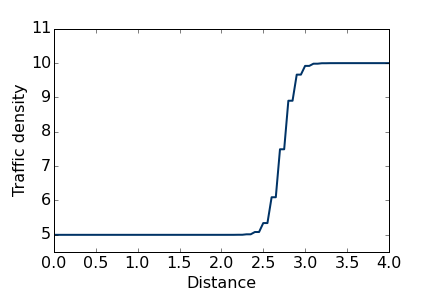
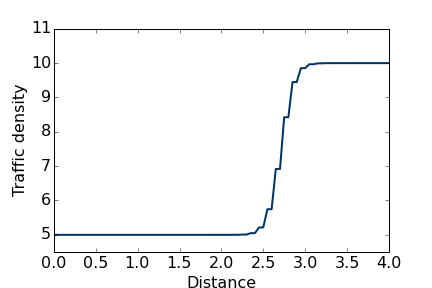
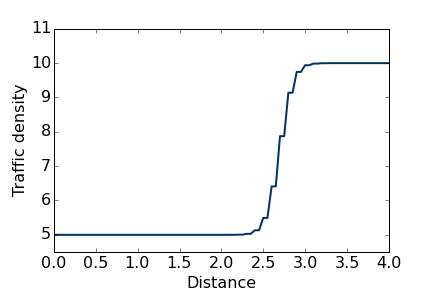
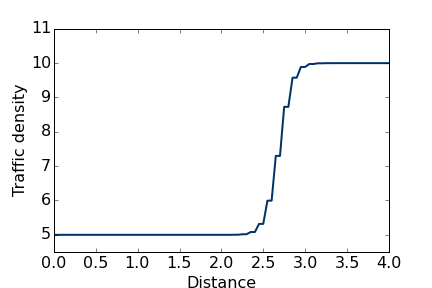
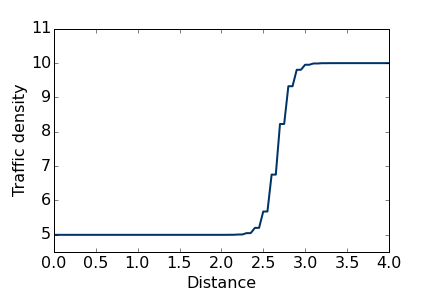
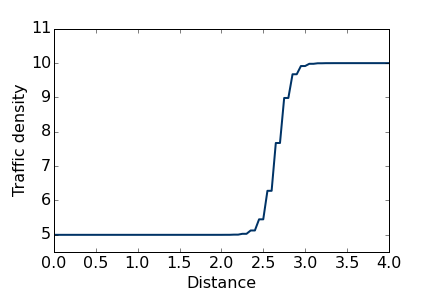
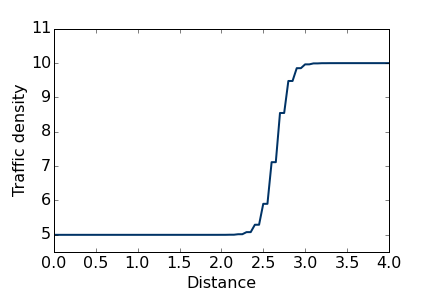
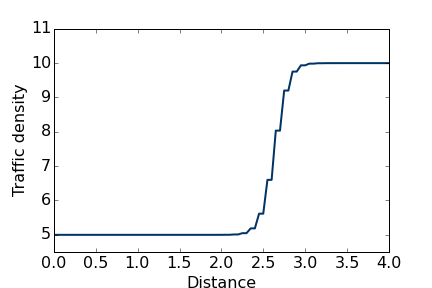
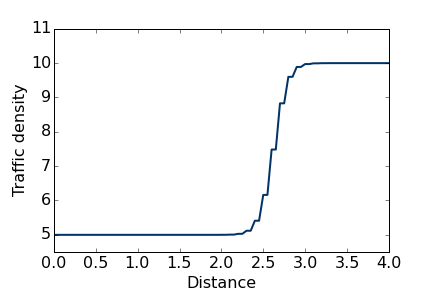
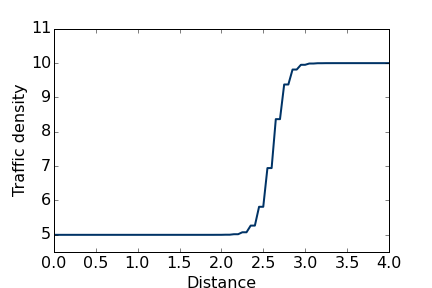

In [183]:
anim = animation.FuncAnimation(fig, animate, frames=DENSITY_n , interval=50)
display_animation(anim, default_mode='once')

Now the Lax Wendroff Scheme

In [184]:
def Jacobian(speed_max, desnity_max, DENSITY):
    return speed_max*(1-2*DENSITY/density_max)


In [185]:
def laxwendroff(DENSITY, nt, dt, dx, density_max, speed_max):
    density_n=numpy.zeros((nt, len(DENSITY)))
    density_n[:,:]=DENSITY.copy()
    
    for t in range(1,nt):
        F=Calculate_Flux(speed_max, density_max, DENSITY)
        J=Jacobian(speed_max, density_max, DENSITY)
        density_n[t,1:-1] = DENSITY[1:-1] - dt/(2*dx)*(F[2:]-F[:-2])+ dt**2/(4*dx**2) * ( (J[2:]+J[1:-1])*(F[2:]-F[1:-1]) - (J[1:-1]+J[:-2])*(F[1:-1]-F[:-2]) )
        density_n[t,0]=DENSITY[0]
        density_n[t,-1]=DENSITY[-1]
        DENSITY=density_n[t].copy()
    return density_n

In [186]:
DENSITY=density_red_light(nx, density_max, density_in)
sigma=1
dt=sigma*dx/speed_max
DENSITY_n = laxwendroff(DENSITY, nt, dt, dx, density_max, speed_max)


C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()



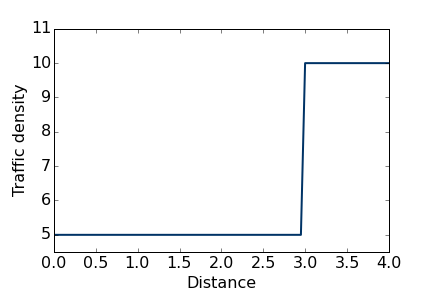
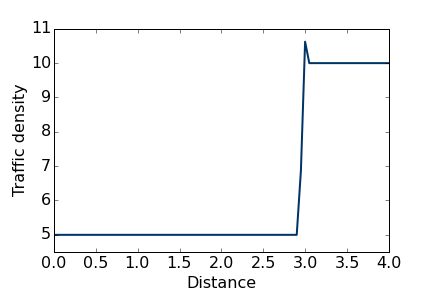
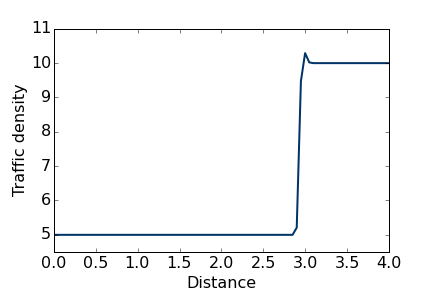
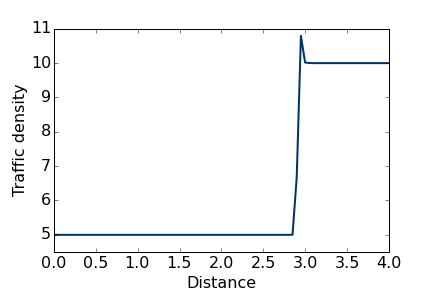
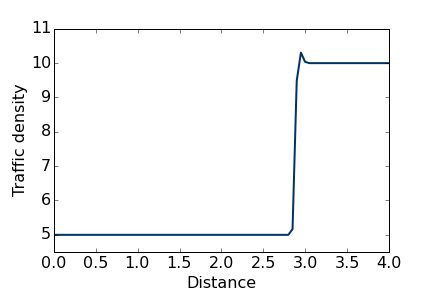
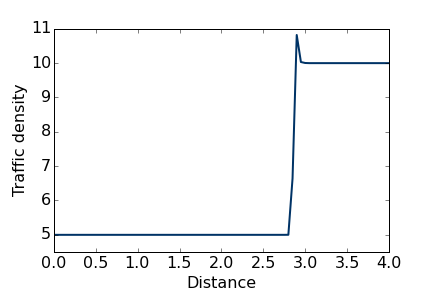
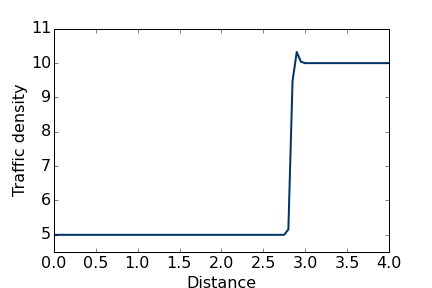
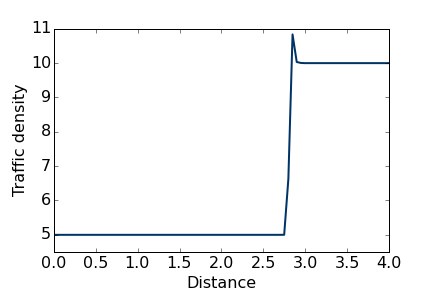
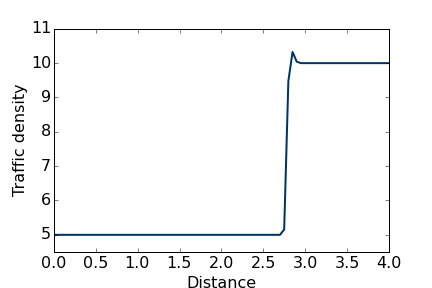
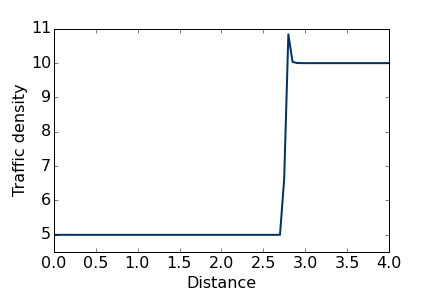
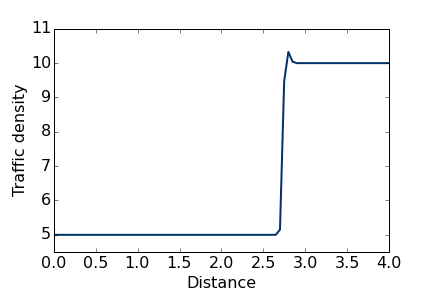
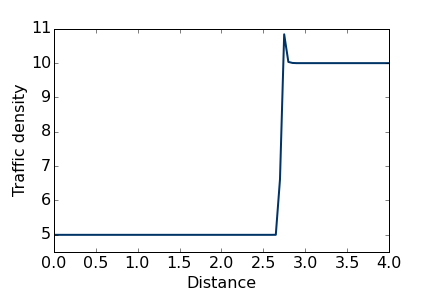
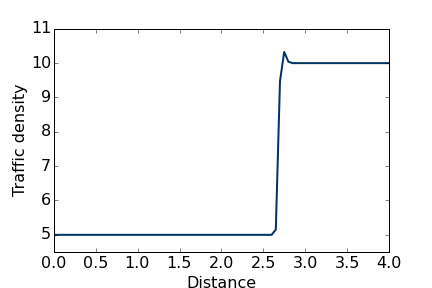
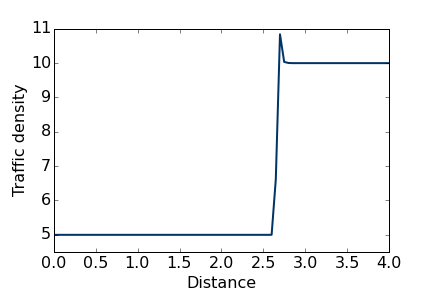
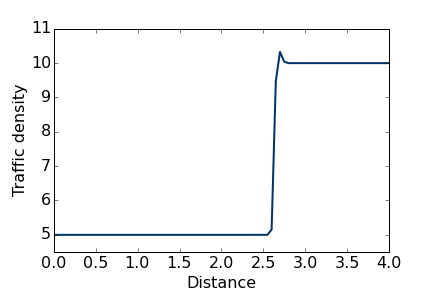
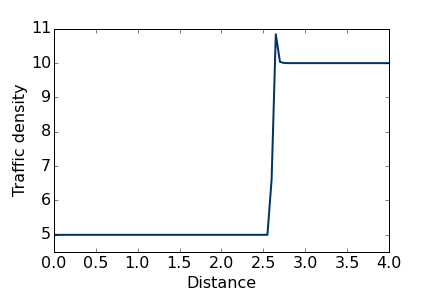
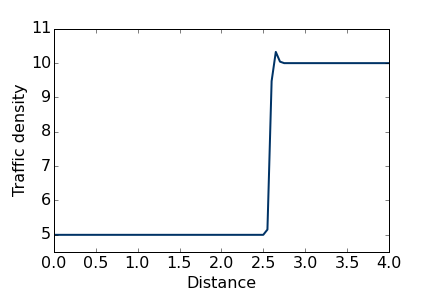
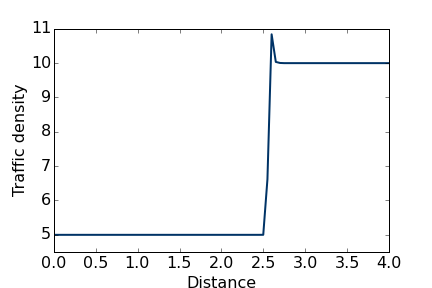
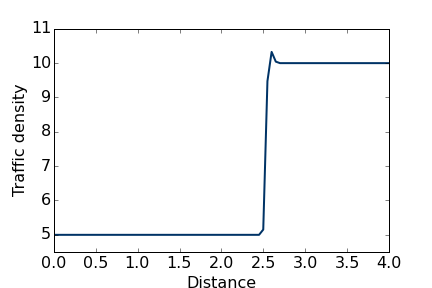
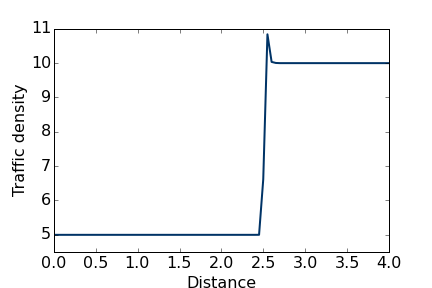
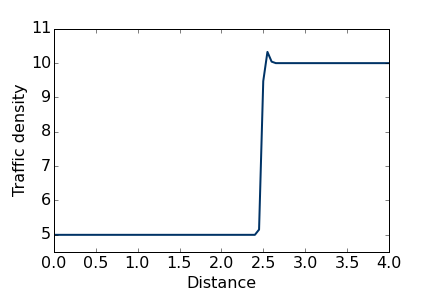
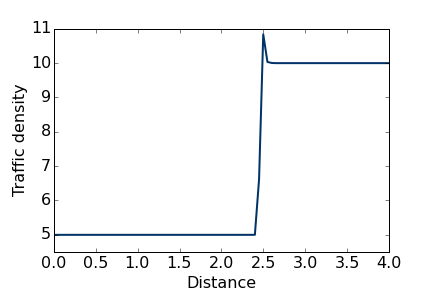
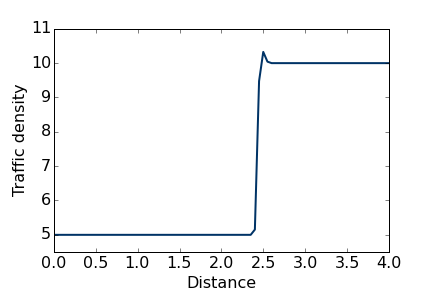
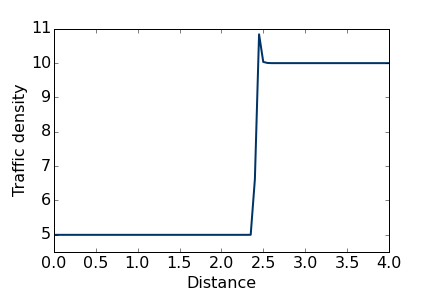
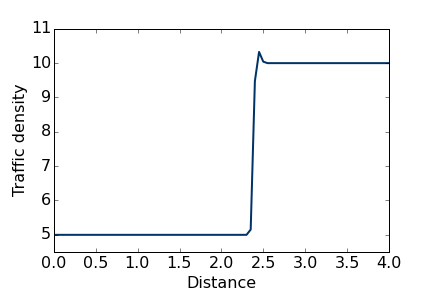
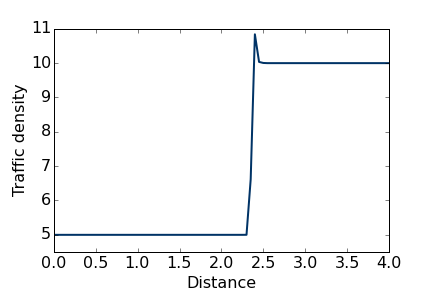
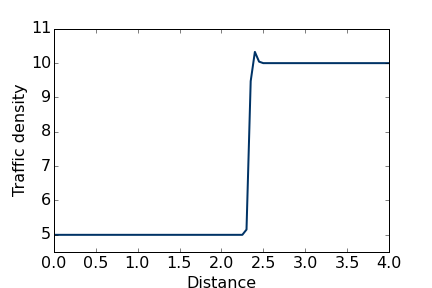
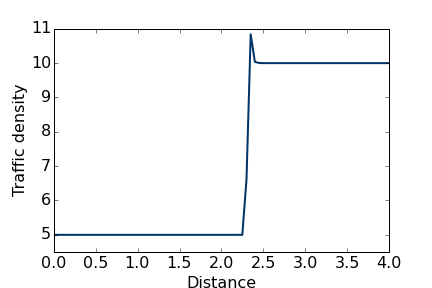
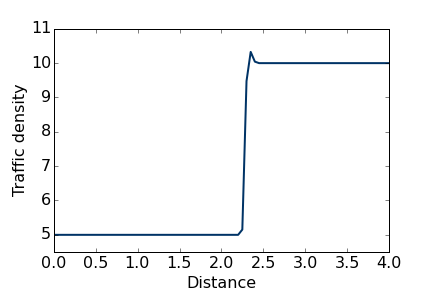
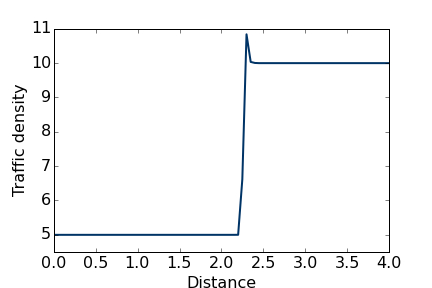

In [187]:

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11.),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=DENSITY_n, interval=50)
display_animation(anim, default_mode='once')


try with CFL = 0.5

C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()



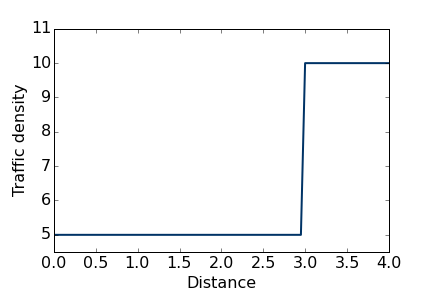
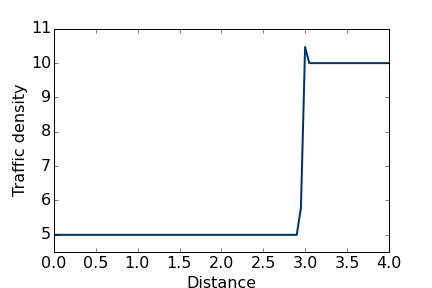
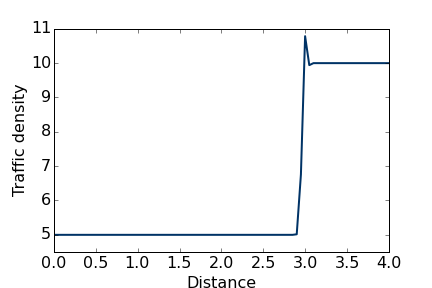
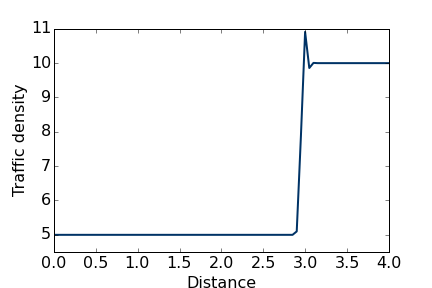
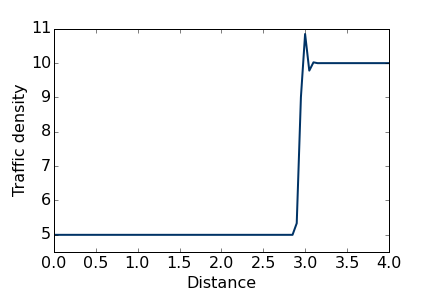
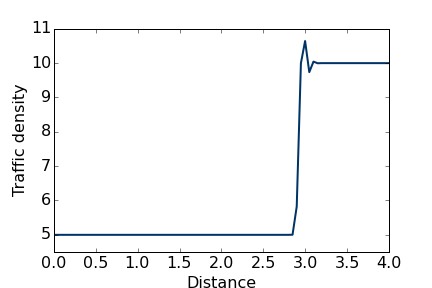
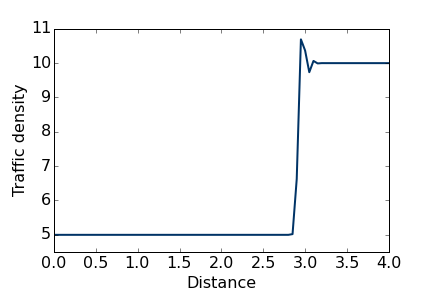
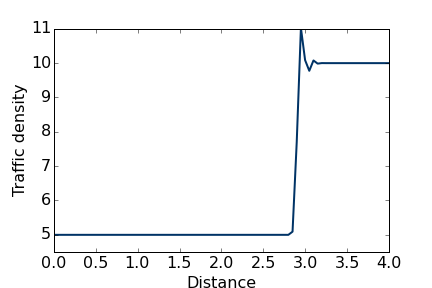
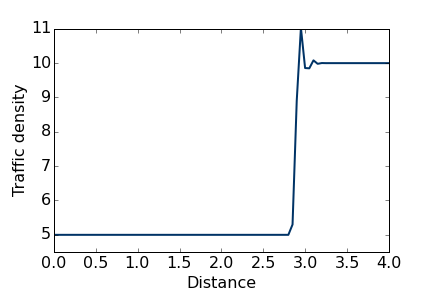
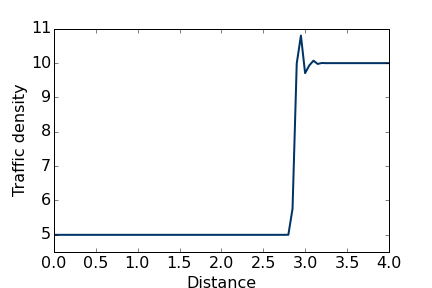
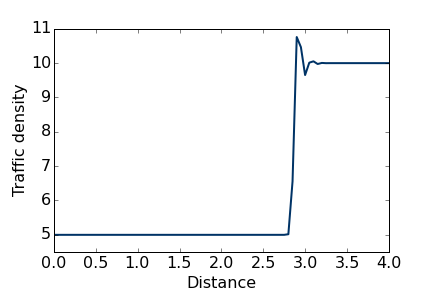
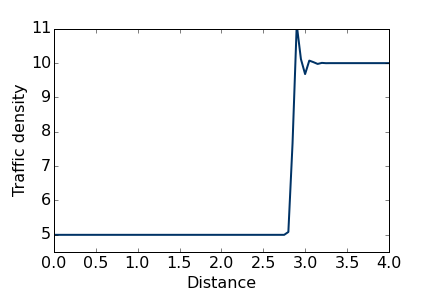
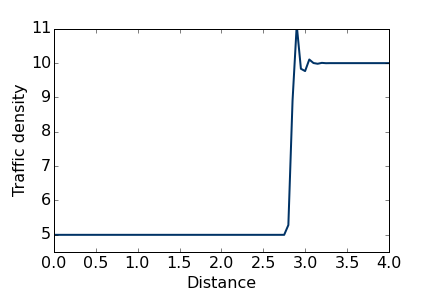
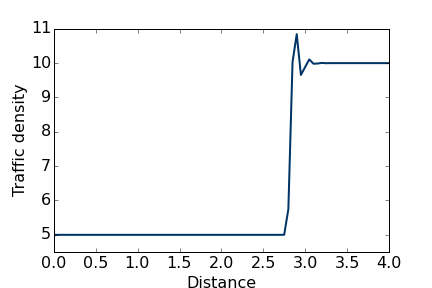
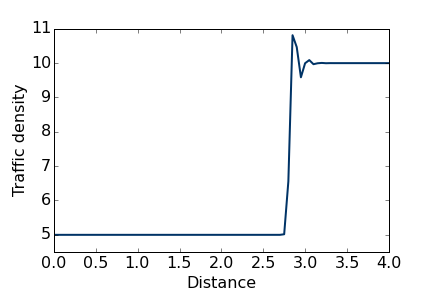
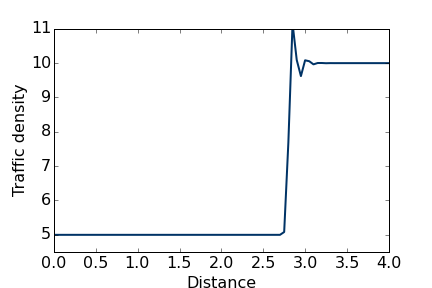
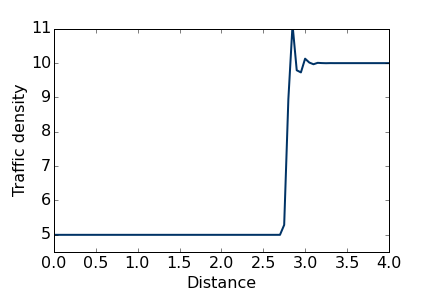
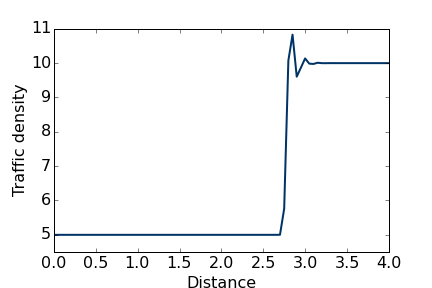
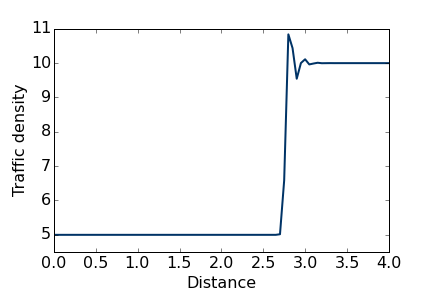
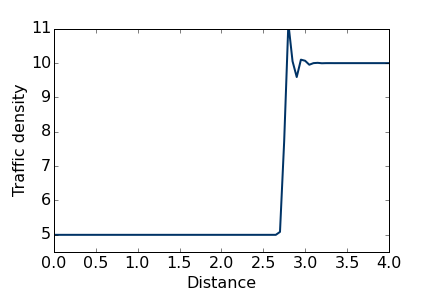
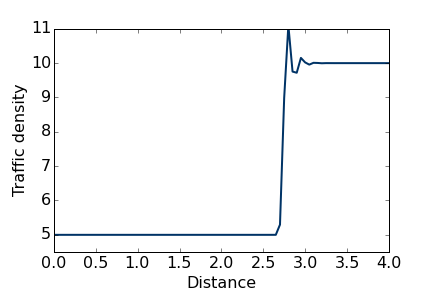
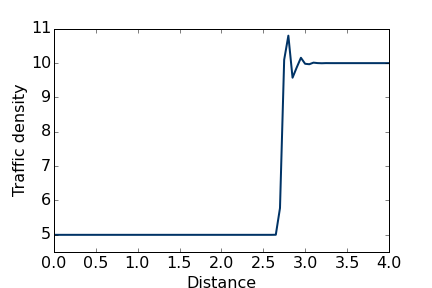
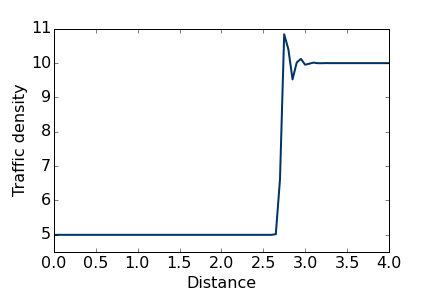
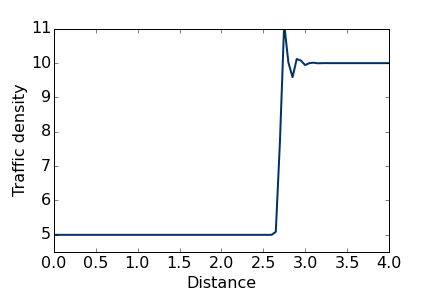
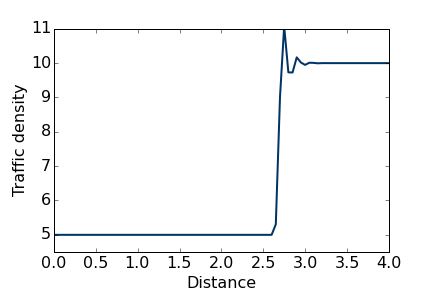
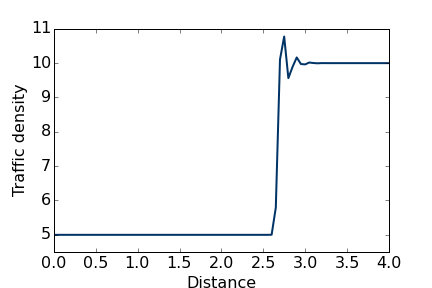
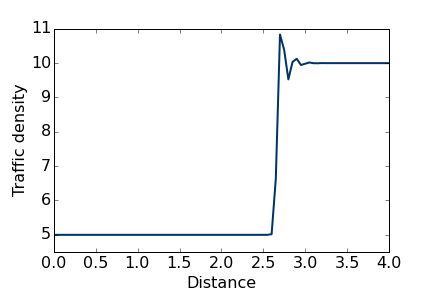
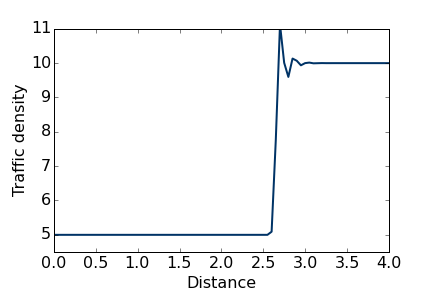
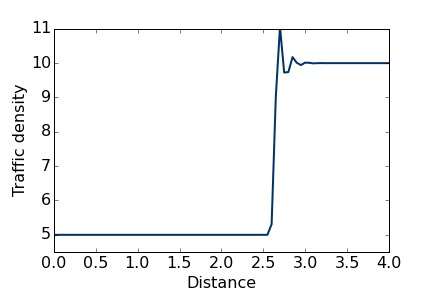
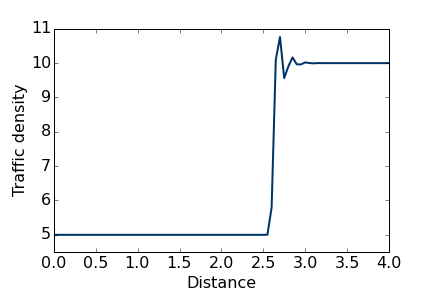

In [188]:
DENSITY = density_red_light(nx, density_max, density_in) 
sigma = 0.5
dt = sigma*dx/speed_max
DENSITY_n = laxwendroff(DENSITY, nt, dt, dx, density_max, speed_max)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=DENSITY_n, interval=50)
display_animation(anim, default_mode='once')

smaller time steps makes the oscillation problem worse

MacCormack Scheme

In [189]:
def maccormack(DENSITY, nt, dt, dx, speed_max, density_max):
    density_n=numpy.zeros((nt, len(DENSITY))
    density_star = numpy.empty_like(DENSITY)
    density_n[:,:] = DENSITY.copy()
    density_star=DENSITY.copy()
    
    for t in range(1, nt):
        F=Calculate_Flux(speed_max, density_max, DENSITY)
        density_starr[:-1] = DENSITY[:-1] - dt/dx * (F[1:]-F[:-1])
        Fstar=Calculate_Flux(speed_max, density_max, density_star)
        density_n[t,1:] = .5 * (DENSITY[1:]+density_star[1:] - dt/dx * (Fstar[1:] - Fstar[:-1]))
        DENSITY= density_n[t].copy()
    return density_n

SyntaxError: invalid syntax (<ipython-input-189-2c14869a363c>, line 3)

In [ ]:
DENSITY = density_red_light(nx, density_max, density_in)

sigma = 1.0
dt = sigma*dx/speed_max

DENSITY_n= maccormack(DENSITY, nt, dt, dx, speed_max, density_max)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=DENSITY_n, interval=50)
display_animation(anim, default_mode='once')